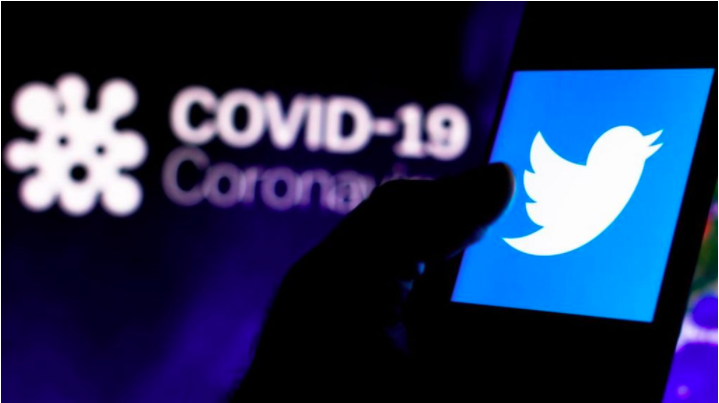

In [399]:
# IMPORTING THE LIBRARIES

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing libraries
import seaborn as sns # for data visualisations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import plotly.express as px
import json

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)


# Run this (by clicking run or pressing Shift+Enter)

In [400]:
# !pip3 install geotext
# !pip3 install country_converter

In [401]:
from geotext import GeoText
import country_converter as coco

Let's dive deep into the data and take out inferences from the dataset.

- Geographical Analysis Report
- Frequency of Tweets Report
- Sentiment Report
- Report of cases in India

In [402]:
# reading the data
df = pd.read_csv("../input/assignment/covid19_tweets.csv")

In [403]:
# printing the top 5 rows of df
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [404]:
print("Columns in the dataset are : \n", df.columns)

Columns in the dataset are : 
 Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


In [405]:
print("Data types of Columns in the dataset are : \n", df.dtypes)

Data types of Columns in the dataset are : 
 user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object


There are different types of data types in the dataset like text data, categorical data, numerical data , datetime format. I will need to handle them differently.

In [406]:
print("Shape of the Dataset : \n", df.shape)

Shape of the Dataset : 
 (179108, 13)


There are 179108 rows and 13 columns in the dataset.

Let's try to look at the distribution of the dataset features one by one, and gather insights.

`WHAT WE CAN FIND HERE ?????`

- Geographical Distribution, Analysis on Retweets, Sentiment of people writing tweets, words used, hastags used, frequencies of speech/tweets, etc.

I will use histograms for plotting continuous variables, and bar graphs for plotting categorical variables

Percentage wise :
 False    87.105545
True     12.894455
Name: user_verified, dtype: float64


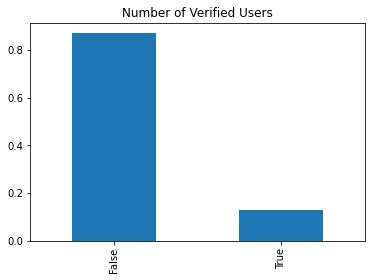

In [407]:
print("Percentage wise :\n", df["user_verified"].value_counts(normalize=True)*100)   # percentage wise
df["user_verified"].value_counts(normalize=True).plot.bar(title = "Number of Verified Users")

- **Roughly `87%` of User's twitter accounts are not verified**

Percentage wise :
 False    100.0
Name: is_retweet, dtype: float64


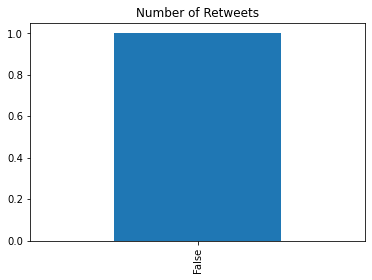

In [408]:
print("Percentage wise :\n", df["is_retweet"].value_counts(normalize=True)*100)   # percentage wise
df["is_retweet"].value_counts(normalize=True).plot.bar(title = "Number of Retweets")

- This seems to be an interesting insight here, There are no retweets by any user for any tweet in the entire dataset **:O**

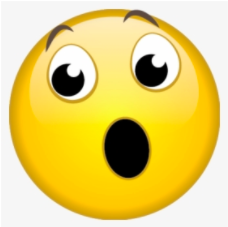

In [409]:
df['user_friends'].unique()

array([  950,  1677,  9525, ...,  7370, 11809,  6980])

In [410]:
df['user_favourites'].unique()

array([18775,    24,  7254, ..., 50127,  5306,  7295])

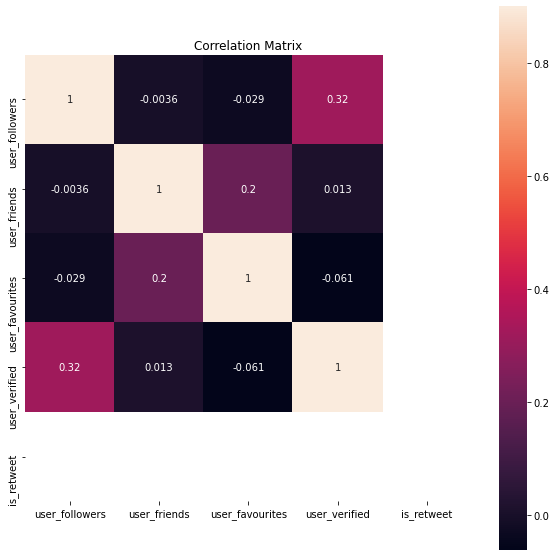

In [411]:
corrmat = df.corr()
plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(corrmat, vmax=.9, annot = True ,square=True)

There is a presence of very Low correlation between variables

# Missing Values

In [412]:
# checking missing data percentage in data
def misssing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  return missing_Data

In [413]:
data_missing = misssing_values(df)
print("Missing values in Data\n\n\n", data_missing)

Missing values in Data


                   Total    Percent
hashtags          51334  28.660920
user_location     36771  20.530071
user_description  10286   5.742904
source               77   0.042991
is_retweet            0   0.000000
text                  0   0.000000
date                  0   0.000000
user_verified         0   0.000000
user_favourites       0   0.000000
user_friends          0   0.000000
user_followers        0   0.000000
user_created          0   0.000000
user_name             0   0.000000


- `hashtags have 28.6% of missing values, followed by user_location consisting 20.5%, user_description having 5.74%,and source containing 0.04%`.

Let's try to plot the count of Unique Values in the dataset for columns

In [414]:
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Columns/Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['No of Unique Values'] = uniques
    
    f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

    sns.barplot(x=unique_dataframe['Columns/Features'], y=unique_dataframe['No of Unique Values'], alpha=0.8)
    plt.title('Bar plot for no of unique values in each column')
    plt.ylabel('no of Unique values', fontsize=12)
    plt.xlabel('Columns/Features', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
    return unique_dataframe

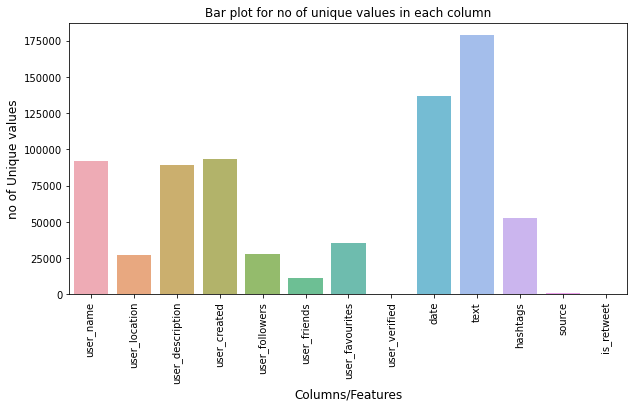

    Columns/Features  No of Unique Values
0          user_name                92276
1      user_location                26920
2   user_description                89200
3       user_created                93708
4     user_followers                27694
5       user_friends                11022
6    user_favourites                35259
7      user_verified                    2
8               date               136611
9               text               178683
10          hashtags                52640
11            source                  610
12        is_retweet                    1


In [415]:
# calling the function to plot and print
unique_df = unique_values(df)
print(unique_df)

# Moving towards Location Analysis (Geographically)

In [416]:
covid_location_count=pd.DataFrame(df['user_location'].value_counts())
covid_location_count.head(10)

,user_location
India,3741
United States,2455
"New Delhi, India",1721
"Mumbai, India",1401
"Washington, DC",1354
"London, England",1269
United Kingdom,1206
London,1103
"New York, NY",1082
Australia,964


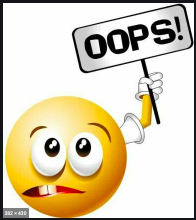

- Oops!!, Here countries and cities are treated similiarly, it seems difficult to analyse in this way, let's try country code and then make use of city names.

Let's try to plot the information for 15 entries

In [417]:
covid_location_count.reset_index(inplace=True) # reset index
covid_location_count.rename(columns={'index':'Location','user_location':'count'},inplace=True)
covid_location_count.sort_values(by='count',inplace=True,ascending=False)
Count_graph=px.bar(x='count',y='Location',data_frame=covid_location_count[:15],color='Location')
Count_graph.show()

- We do have the information, but I will try to make it more insightful here, so please bear with me :), I have found an amazing python library, you are going to love it :D
- I am going to use geotext (https://pypi.org/project/geotext/) library to get country name and city names from text to get a better picture.

In [418]:
covid_location_count.head()

,Location,count
0,India,3741
1,United States,2455
2,"New Delhi, India",1721
3,"Mumbai, India",1401
4,"Washington, DC",1354


In [419]:
Location_country=covid_location_count.copy() # saving a copy in case we make chages to this dataframe
Location_country['Location']=Location_country['Location'].apply(lambda x:x.replace(',',' '))
Location_country['Location']=Location_country['Location'].apply(lambda x:(GeoText(x).country_mentions))
Location_country.head()

,Location,count
0,{'IN': 1},3741
1,{'US': 1},2455
2,{'IN': 2},1721
3,{'IN': 2},1401
4,{'US': 1},1354


In [420]:
Location_country.drop(Location_country[Location_country['Location']=='[]'].index,inplace=True)
Location_country['Location']=Location_country['Location'].apply(lambda x:(x.keys()))
Location_country['Location']=Location_country['Location'].apply(lambda x:list(x))
Location_country.drop(Location_country.index[Location_country.Location.map(len)==0],inplace=True)
Location_country['Location']=Location_country['Location'].apply(lambda x:str(x[0]))
agg_func={'count':'sum'}
Location_country=Location_country.groupby(['Location']).aggregate(agg_func)
Location_country.sort_values(by=['count'],ascending=False,inplace=True)
Location_country.reset_index(inplace=True)
Location_country.head(10)

,Location,count
0,US,36228
1,IN,18469
2,GB,8854
3,CA,5022
4,AU,3246
5,ZA,3018
6,NG,2372
7,PH,1465
8,IE,1430
9,KE,1422


In [421]:
Count_graph=px.bar(x='Location',y='count',data_frame=Location_country[:20],color='Location')
Count_graph.show()

- I have given you an interesting plot, try adjusting your cursor on coloured bars, you will love it :D
- Ohh, I don't think many people will be able to decode the country name from here, let's try coco country converter(https://pypi.org/project/country-converter/) python library to match country names in a standard way.

In [422]:
cc = coco.CountryConverter()
Location_country['Location']=Location_country['Location'].apply(lambda x:cc.convert(names=x,to='ISO3'))

In [423]:
Count_graph_re=px.bar(x='Location',y='count',data_frame=Location_country[:20],color='Location')
Count_graph_re.show()

- Yeah !! Now, we are talking. I can clearly infer from the above graph now that USA has the maximum count for user location tweets, followed by India. (Please point your cursor on the bar, and you will get the count)

In [424]:
india_states = json.load(open("../input/country-state-geo-location/countries.geo.json", "r"))
fig = px.choropleth(
    Location_country,
    locations="Location",
    geojson=india_states,
    color="count",
    #hover_name="State or union territory",
    hover_data=["count"],
    title="Number of Tweets from each Country",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

- Hover your cursor and zoom in and out for clear visualisation.
- Geographically shown, USA represents high counts and India following.

In [425]:
df['date'] = pd.to_datetime(df['date']) 
df = df.sort_values(['date'])
df['day'] = df['date'].astype(str).str.split(' ', expand=True)[0]
df['time'] = df['date'].astype(str).str.split(' ', expand=True)[1]
df.head()
# splitting into day & time

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,day,time
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,NaN,Twitter Web App,False,2020-07-24,23:47:08
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,2020-07-24,23:47:12
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2020-07-24,23:47:12
17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2020-07-24,23:47:12
17171,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",NaN,Twitter Web App,False,2020-07-24,23:47:13


In [426]:
df['hashtags'] = df['hashtags'].fillna('[]')
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
df.loc[df['hashtags'] == '[]', 'hashtags_count'] = 0
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,day,time,hashtags_count
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,[],Twitter Web App,False,2020-07-24,23:47:08,0
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,2020-07-24,23:47:12,1
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2020-07-24,23:47:12,1
17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2020-07-24,23:47:12,1
17171,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",[],Twitter Web App,False,2020-07-24,23:47:13,0
17170,Ben Garnham Pennywise,"Wales, United Kingdom","DJ, Radio Host, Pennywise, Terminator, Lost Bo...",2010-11-28 22:00:30,613,1996,535,False,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,"['borisjohnson', 'dumbanddumber', 'coronavirus...",Twitter for Android,False,2020-07-24,23:47:20,5
17169,Jason Schreiber,New Hampshire,Reporter for the New Hampshire Union Leader. D...,2009-03-27 02:33:49,4557,2385,9375,False,2020-07-24 23:47:24,"While the stands may be empty at #Fenway, the ...",['Fenway'],Twitter for iPhone,False,2020-07-24,23:47:24,1
17168,carsinogenic,NaN,cars are WMDs \r\ntoo many on this planet 4 fa...,2008-09-09 00:50:11,749,3076,26747,False,2020-07-24 23:47:28,Chief public health officer warns of pandemic ...,['COVID19'],Twitter Web App,False,2020-07-24,23:47:28,1
17167,Michael Bennett-Spears,"Siloam Springs, AR",AR87 needs representation that listens to and ...,2019-12-13 22:30:05,115,193,51,False,2020-07-24 23:47:36,My opponent doesn't care about you. That's it....,[],Twitter for iPhone,False,2020-07-24,23:47:36,0
17166,City of Derby,"Derby, Kansas","Derby is a growing community of 24,000 people....",2009-09-17 13:51:58,4117,2095,2522,False,2020-07-24 23:47:38,"This week, the @SedgwickCounty Commission pass...",[],Twitter Web App,False,2020-07-24,23:47:38,0


In [427]:
dss = df['user_name'].value_counts().reset_index()
dss.columns = ['user_name', 'tweets_count']
dss = dss.sort_values(['tweets_count'])
fig = px.bar(
    dss.tail(40), 
    x="tweets_count", 
    y="user_name", 
    orientation='h', 
    title='Top 40 users on # of tweets', 
    width=800, 
    height=800
)
fig.show()

- Top 40 users list includes names like GlobalPandemic.NET, coronavirus updates, covidnews.ch, Hindustan Times, etc

In [428]:
df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year
data = df.drop_duplicates(subset='user_name', keep="first")
data = data[data['year_created']>1970]

data = data['year_created'].value_counts().reset_index()
data.columns = ['year', 'number']

fig = px.bar(
    data, 
    x="year", 
    y="number", 
    orientation='v', 
    title='User Creation pattern on Twitter every year', 
    width=800, 
    height=600
)
fig.show()

- **Now, clearly Coronavirus is increasing user base for Twitter every year in general. GOOD FOR TWITTER :D**

In [429]:
ds = df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(40), 
    x="count", 
    y="user_location", 
    orientation='h', title='Top 40 Users locations by no. of tweets', 
    width=800, 
    height=800
)
fig.show()

- **Maximum number of users tweeting are from INDIA, followed by USA**

In [430]:
ds = df['source'].value_counts().reset_index()
ds.columns = ['source', 'count']
ds = ds.sort_values(['count'])
fig = px.bar(
    ds.tail(40), 
    x="count", 
    y="source", 
    orientation='h', 
    title='Top 40 user sources by number of tweets', 
    width=800, 
    height=800
)
fig.show()

- **Maximum number of people use Twitter as Web App for source for tweets, then followed by android and iphone devices**

In [431]:
# no of unique users in one day
ds = df.groupby(['day', 'user_name'])['hashtags_count'].count().reset_index()
ds = ds.groupby(['day'])['user_name'].count().reset_index()
ds.columns = ['day', 'number_of_users']
ds['day'] = ds['day'].astype(str) + ':00:00:00'
fig = px.bar(
    ds, 
    x='day', 
    y="number_of_users", 
    orientation='v',
    title='Number of unique users per day', 
    width=800, 
    height=800
)
fig.show()

In [432]:
ds = df['day'].value_counts().reset_index()
ds.columns = ['day', 'count']
ds = ds.sort_values('count')
ds['day'] = ds['day'].astype(str) + ':00:00:00'
fig = px.bar(
    ds, 
    x='count', 
    y="day", 
    orientation='h',
    title='Tweets distribution over days present in dataset', 
    width=800, 
    height=800
)
fig.show()

In [433]:
df['hour'] = df['date'].dt.hour
ds = df['hour'].value_counts().reset_index()
ds.columns = ['hour', 'count']
ds['hour'] = 'Hour ' + ds['hour'].astype(str)
fig = px.bar(
    ds, 
    x="hour", 
    y="count", 
    orientation='v', 
    title='Tweets distribution over hours', 
    width=800
)
fig.show()

- **Hour 7 in the morning sees maximum people tweeting, then followed by Hour 6, 8 and 5, ..**

In [434]:
def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='gray', 
        stopwords=set(STOPWORDS), 
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

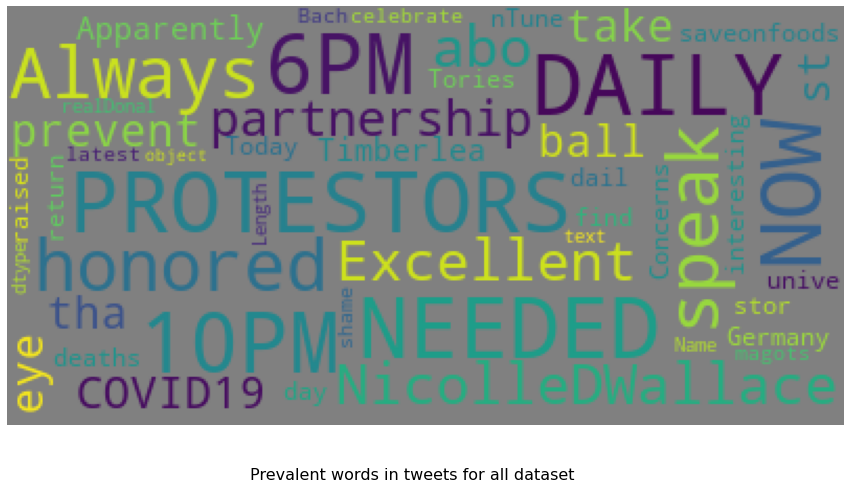

In [435]:
build_wordcloud(df['text'], 'Prevalent words in tweets for all dataset')

In [436]:
#Removing Stop Words
df['text'] = df['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
df['text'].head() 

17175    PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...
17174    Always honored speak w @NicolleDWallace critic...
17173    Excellent partnership prevent #COVID19, thank ...
17172    Don't take eye ball. There still protests goin...
17171    Apparently, Timberlea @saveonfoods store Fort ...
Name: text, dtype: object

In [437]:
df['sentiment'] = ' '
df['polarity'] = None
for i,tweets in enumerate(df.text) :
    blob = TextBlob(tweets)
    df['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        df['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        df['sentiment'][i] = 'negative'
    else :
        df['sentiment'][i] = 'neutral'
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,day,time,hashtags_count,year_created,hour,sentiment,polarity
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,[],Twitter Web App,False,2020-07-24,23:47:08,0,2020,23,negative,-0.25
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored speak w @NicolleDWallace critic...,['covid19'],Twitter Web App,False,2020-07-24,23:47:12,1,2009,23,neutral,0
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership prevent #COVID19, thank ...",['COVID19'],Twitter for Android,False,2020-07-24,23:47:12,1,2017,23,neutral,0
17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take eye ball. There still protests goin...,['COVID19'],Twitter for Android,False,2020-07-24,23:47:12,1,2011,23,neutral,0
17171,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, Timberlea @saveonfoods store Fort ...",[],Twitter Web App,False,2020-07-24,23:47:13,0,2017,23,neutral,0


neutral     79812
positive    70555
negative    28741
Name: sentiment, dtype: int64


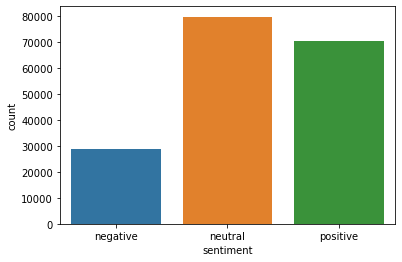

In [438]:
print(df.sentiment.value_counts())
sns.countplot(x='sentiment', data = df);

- **WOW, this is great as Negative Sentiments of the people are the lowest. A will to fight and responsibilty has been identified by individuals against COVID-19**

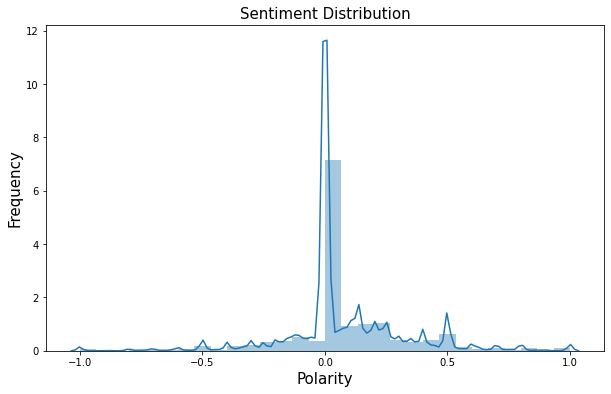

In [439]:
plt.figure(figsize=(10,6))
sns.distplot(df['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

In [440]:
count = pd.DataFrame(df.groupby('sentiment').sum())
count.head()

,user_followers,user_friends,user_favourites,user_verified,is_retweet,hashtags_count,year_created,hour
sentiment,,,,,,,,
negative,3008568813,60188025,413543112,3631,0,42838,57874571,267558
neutral,8808460997,170224606,1162107195,10311,0,118657,160713540,743573
positive,7715687732,149601093,1011404570,9153,0,104499,142072733,663370


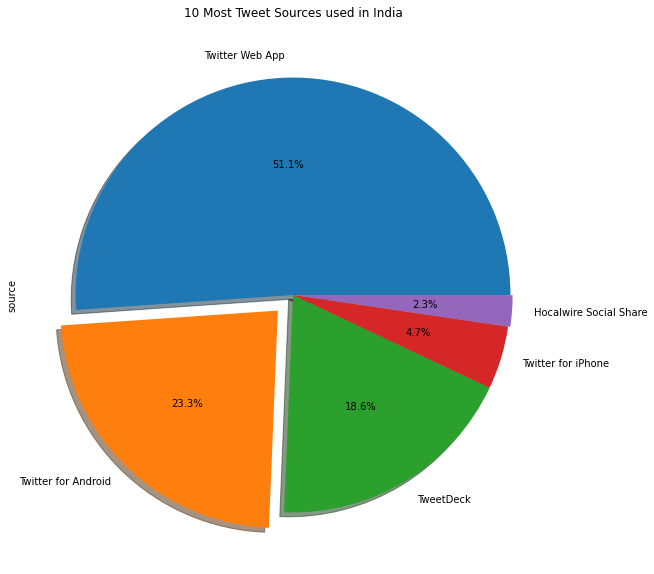

In [441]:
pla = df['source'][df['user_location'] == 'India'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(10,10))
pla[0:5].plot(kind = 'pie', title = '10 Most Tweet Sources used in India', autopct='%1.1f%%',shadow=True,explode = explode)

plt.show()

- Top Tweet sources in India are Twitter Web App, (51%), then Twitter for Android (23%), TweetDeck(18.6%), and so on

# I hope the notebook is insightful . Thanks